# Bank Marketing Analysis for Term Deposit

Abstract:
<br>
The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

Data Set Information:
<br>
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls.

**Marketing campaigns** are characterized by focusing on the customer needs and their overall satisfaction. Nevertheless, there are different variables that determine whether a marketing campaign will be successful or not. There are certain variables that we need to take into consideration when making a marketing campaign.

The 4 Ps:
1. Segment of the **Population**: To which segment of the population is the marketing campaign going to address and why? This aspect of the marketing campaign is extremely important since it will tell to which part of the population should most likely receive the message of the marketing campaign.

2. Distribution channel to reach the customer's **place**: Implementing the most effective strategy in order to get the most out of this marketing campaign. What segment of the population should we address? Which instrument should we use to get our message out? (Ex: Telephones, Radio, TV, Social Media Etc.)

3. **Price**: What is the best price to offer to potential clients?

4. **Promotional** Strategy: This is the way the strategy is going to be implemented and how are potential clients going to be address.

##### What is a Term Deposit?
A Term deposit is a deposit that a bank or a financial institurion offers with a fixed rate (often better than just opening deposit account) in which your money will be returned back at a specific maturity time.

##### Dataset Description

1. age: Client's age (numeric)
2. job: Type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. marital: Marital status (categorical: 'divorced','married','single')
4. education: (categorical: primary, secondary, tertiary and unknown)
5. default: Has credit in default? (categorical: 'no','yes','unknown')
6. housing: Has housing loan? (categorical: 'no','yes')
7. loan: Has personal loan? (categorical: 'no','yes')
8. balance: Balance of the individual. (numeric)
9. contact: Contact communication type (categorical: 'cellular','telephone', 'unknown')
10. month: Last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
11. day: Last contact day of the week (numerical 1-31)
12. duration: Last contact duration, in seconds (numeric).
13. campaign: Number of contacts performed during this campaign and for this client (numeric, includes last contact)
14. pdays: Number of days that passed by after the client was last contacted from a previous campaign (numeric) NOTE : -1 means that the client wasn't contacted before or stands for missing data.
15. previous: Number of contacts performed before this campaign and for this client (numeric)
16. poutcome: Outcome of the previous marketing campaign (categorical: 'failure','success', 'other', 'unknown')
17. deposit - Has the client subscribed a term deposit? ('yes','no')

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('bank.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [5]:
df['deposit_rate'] = df['deposit'].replace("no", 0).replace("yes", 1)

In [6]:
listItem = []
for col in df.columns:
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                   round((df[col].isna().sum()/len(df[col])) * 100,2),
                   df[col].nunique(), list(df[col].unique()[:3])])
    
dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null',
                              'nullPct', 'unique', 'uniqueSample'], data=listItem)

dfDesc

,dataFeatures,dataType,null,nullPct,unique,uniqueSample
0,age,int64,0,0.0,76,"[59, 56, 41]"
1,job,object,0,0.0,12,"[admin., technician, services]"
2,marital,object,0,0.0,3,"[married, single, divorced]"
3,education,object,0,0.0,4,"[secondary, tertiary, primary]"
4,default,object,0,0.0,2,"[no, yes]"
5,balance,int64,0,0.0,3805,"[2343, 45, 1270]"
6,housing,object,0,0.0,2,"[yes, no]"
7,loan,object,0,0.0,2,"[no, yes]"
8,contact,object,0,0.0,3,"[unknown, cellular, telephone]"
9,day,int64,0,0.0,31,"[5, 6, 7]"


### Target Value Count

In [7]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

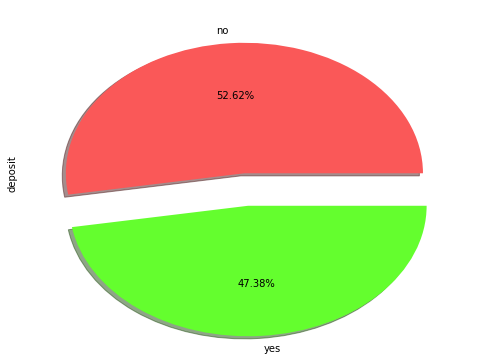

In [8]:
plt.figure(figsize=(8,6))
colors = ["#FA5858", "#64FE2E"]

df['deposit'].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', colors=colors, shadow=True)

plt.show()

# Categorical Features Correlation

### Job and Deposit Correlation

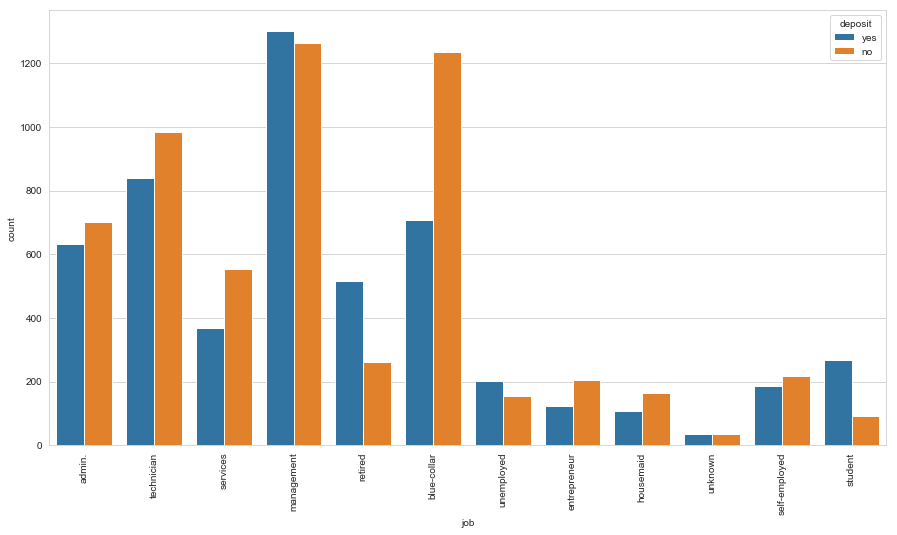

In [9]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x='job', hue='deposit', data=df)
plt.xticks(rotation=90)
plt.show()

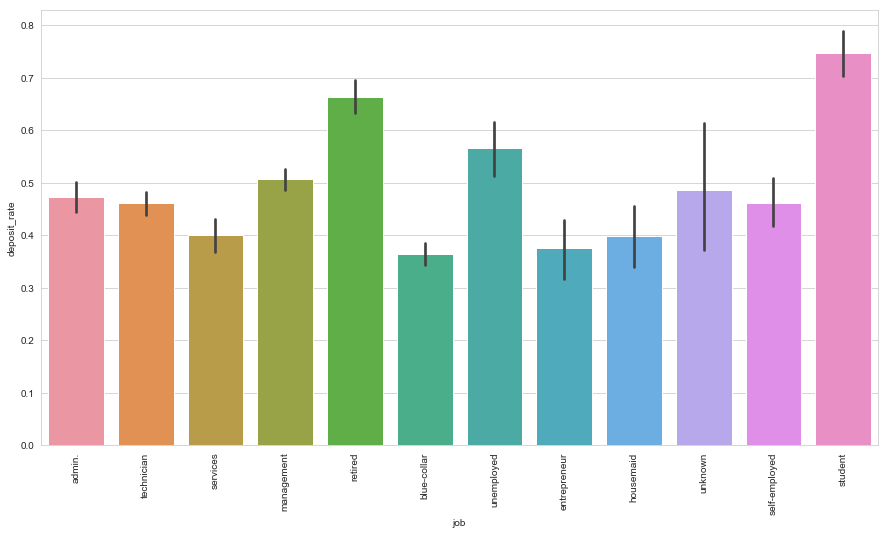

In [10]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.barplot(x='job', y='deposit_rate', data=df)
plt.xticks(rotation=90)
plt.show()

In [11]:
df.groupby('job')['balance'].mean().sort_values(ascending=False)

job
retired          2417.250643
unknown          1945.457143
self-employed    1865.372840
management       1793.663679
entrepreneur     1621.942073
technician       1556.294569
student          1500.783333
housemaid        1366.160584
unemployed       1314.719888
blue-collar      1203.926440
admin.           1195.866567
services         1081.171181
Name: balance, dtype: float64

### Marital and Deposit Correlation

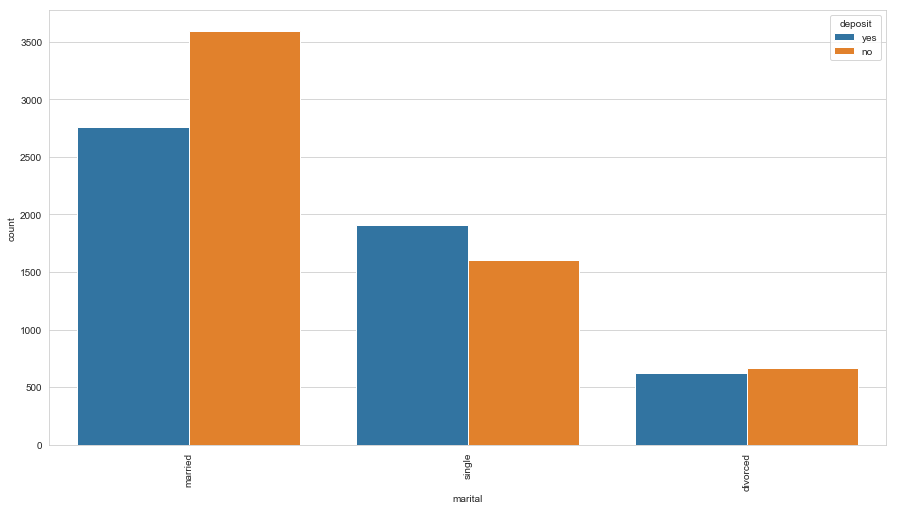

In [12]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x='marital', hue='deposit', data=df)
plt.xticks(rotation=90)
plt.show()

### Education and Deposit Correlation

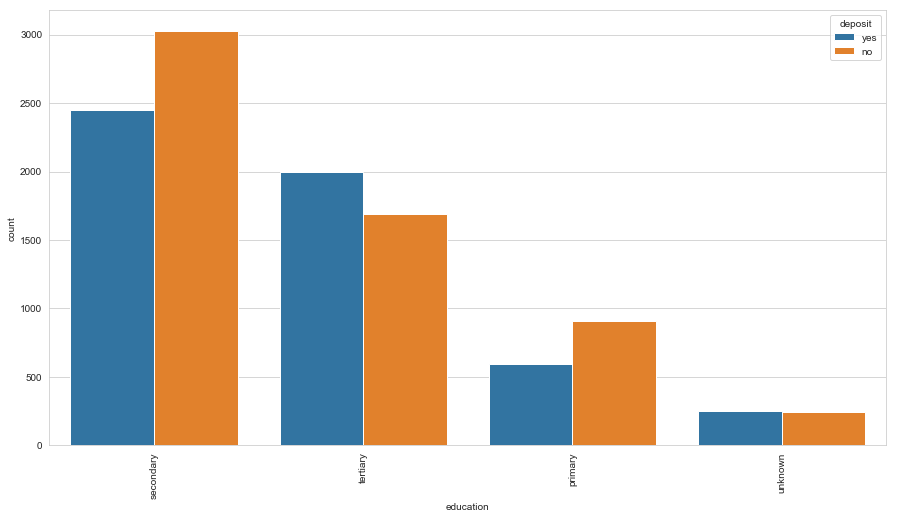

In [13]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x='education', hue='deposit', data=df)
plt.xticks(rotation=90)
plt.show()

In [176]:
df.groupby(['marital', 'education'])['balance'].mean()

marital   education
divorced  primary      1415.764706
          secondary    1006.457055
          tertiary     1913.435233
          unknown      1768.058824
married   primary      1568.636033
          secondary    1442.626923
          tertiary     1862.746066
          unknown      1741.079585
single    primary      1379.695431
          secondary    1139.859155
          tertiary     1806.701370
          unknown      1749.808917
Name: balance, dtype: float64

### Default and Deposit Correlation

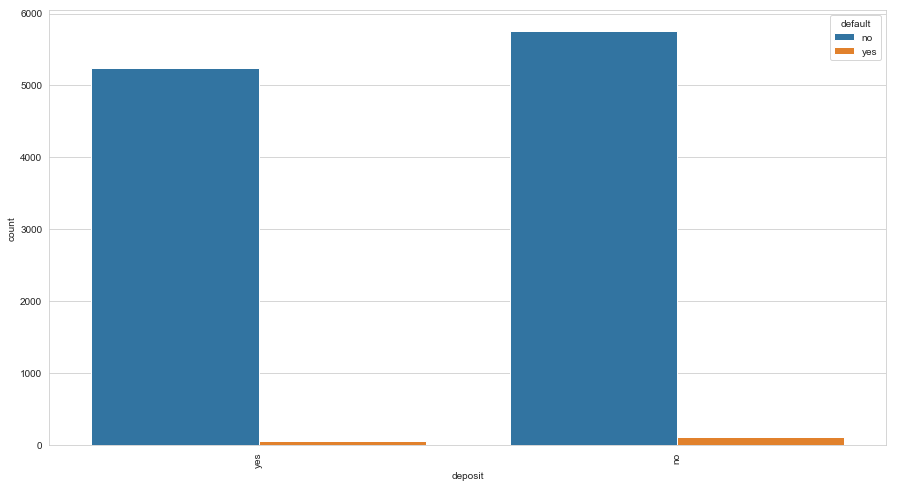

In [14]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x='deposit', hue='default', data=df)
plt.xticks(rotation=90)
plt.show()

### Housing and Deposit Correlation

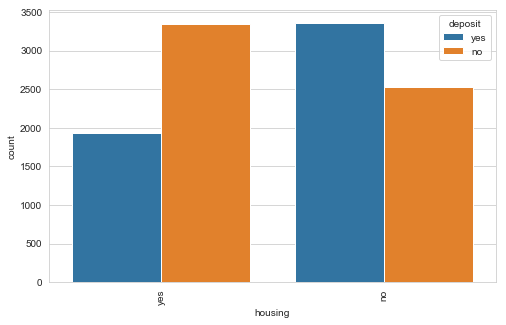

In [15]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='housing', hue='deposit', data=df)
plt.xticks(rotation=90)
plt.show()

### Loan and Deposit Correlation

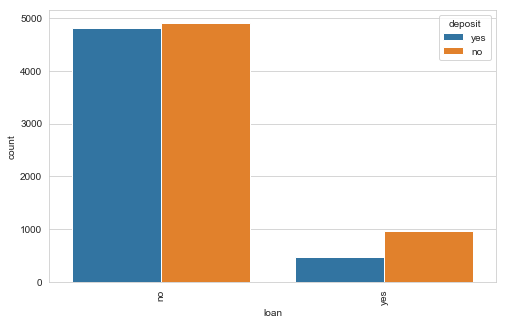

In [16]:
plt.figure(figsize=(8,5))
sns.set_style('whitegrid')
sns.countplot(x='loan', hue='deposit', data=df)
plt.xticks(rotation=90)
plt.show()

### Month and Deposit Correlation

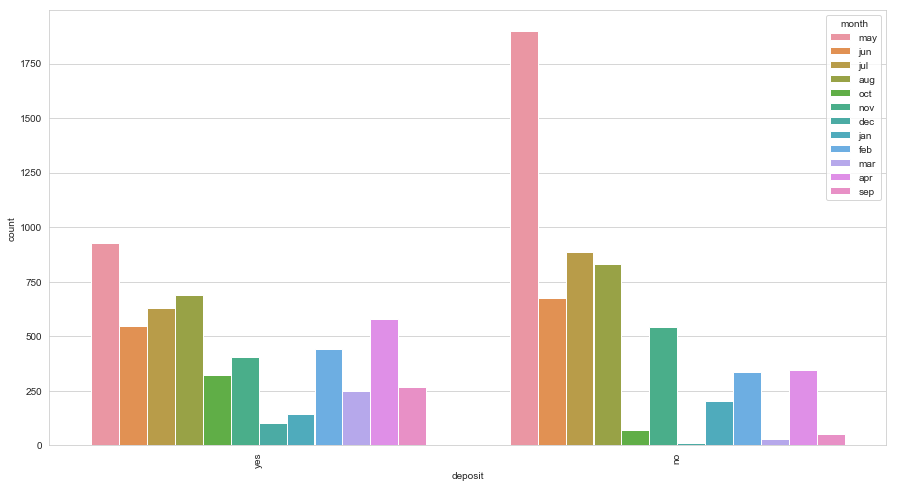

In [17]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x='deposit', hue='month', data=df)
plt.xticks(rotation=90)
plt.show()

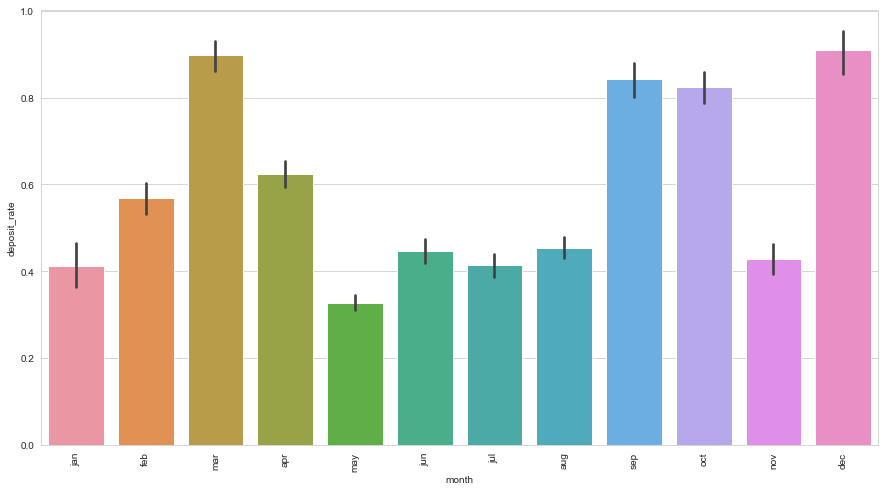

In [168]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.barplot(x='month', y='deposit_rate', data=df, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep','oct','nov','dec'])
plt.xticks(rotation=90)
plt.show()

### Contact and Deposit Correlation

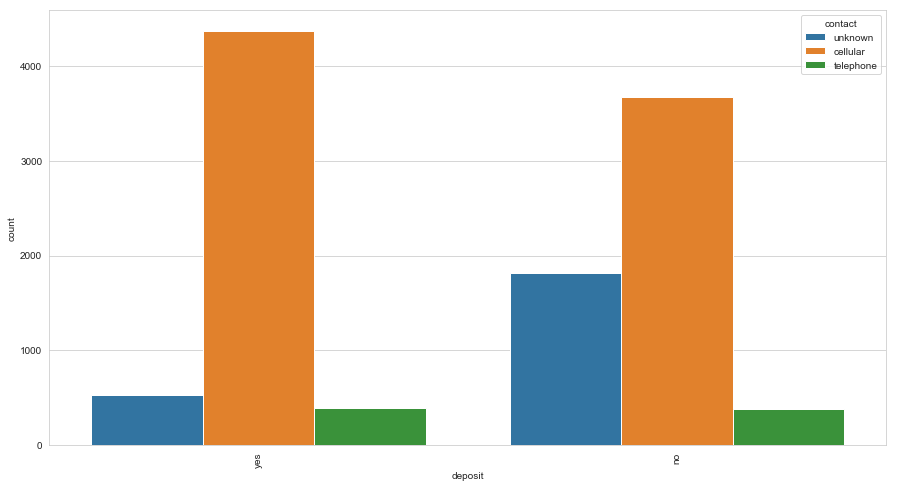

In [19]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x='deposit', hue='contact', data=df)
plt.xticks(rotation=90)
plt.show()

### Poutcome with Deposit

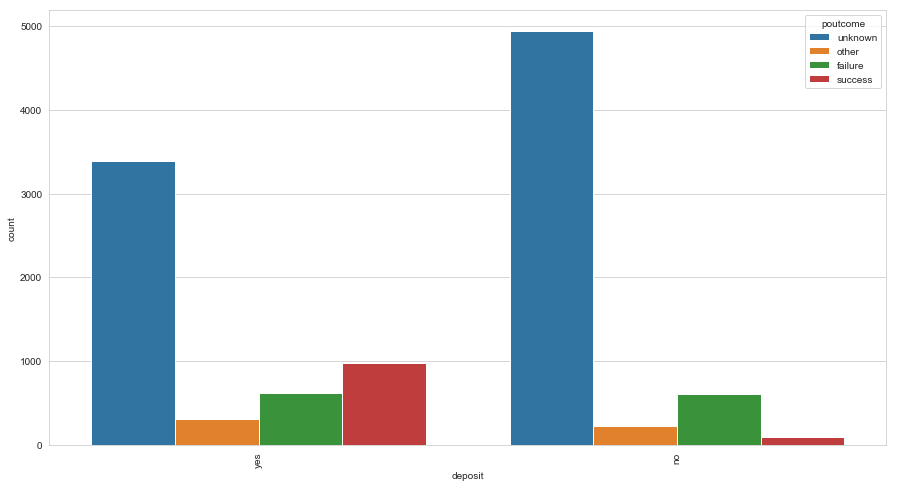

In [20]:
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
sns.countplot(x='deposit', hue='poutcome', data=df)
plt.xticks(rotation=90)
plt.show()

In [21]:
(len(df[df['poutcome'] == 'unknown']) + len(df[df['poutcome'] == 'other']))/len(df)

0.7940333273606881

## Numerical Features

In [22]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous,deposit_rate
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,0.473840
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,0.499338
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,1.000000


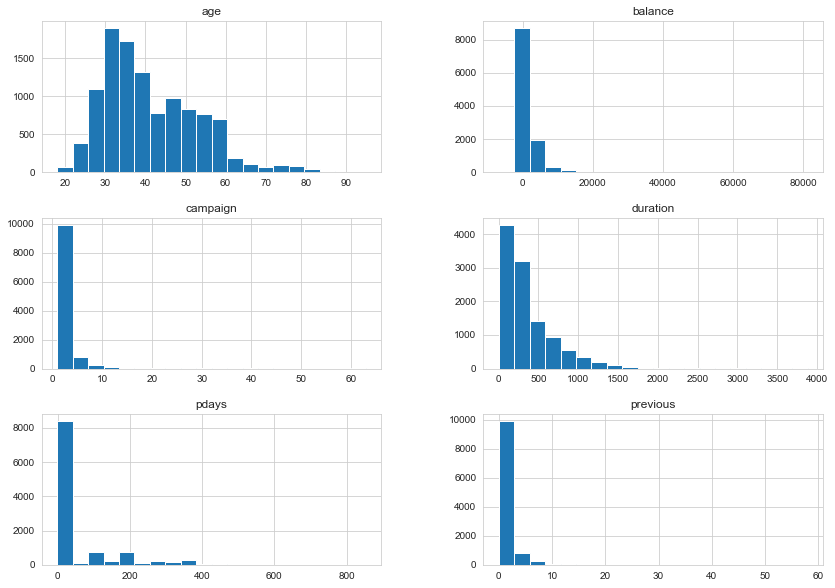

In [23]:
df.drop(['deposit_rate', 'day'],axis=1).hist(bins=20, figsize=(14,10))
plt.show()

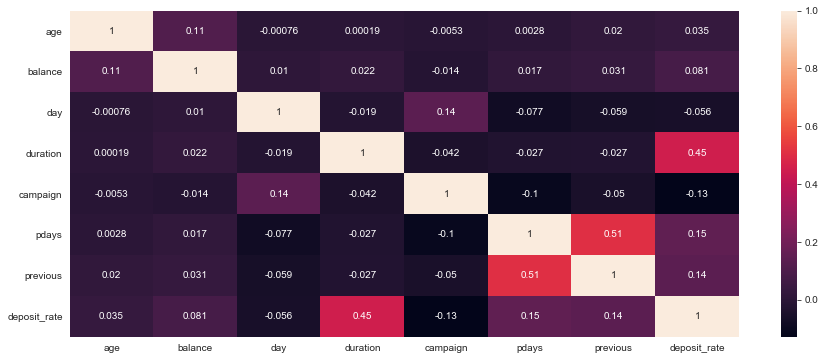

In [24]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

### Campaign

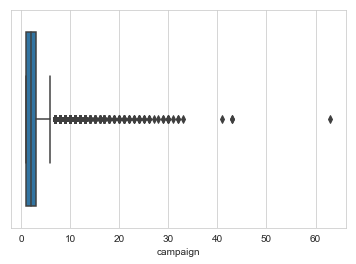

In [25]:
sns.boxplot(df['campaign'])

In [26]:
len(df[df['campaign'] > 20])

42

In [27]:
df[df['campaign'] > 20]['deposit'].value_counts()

no     38
yes     4
Name: deposit, dtype: int64

In [28]:
df['campaign'] = df['campaign'].map(lambda x: 2 if x>20 else x)

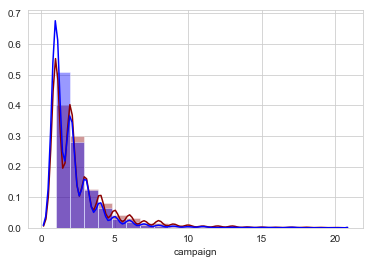

In [29]:
sns.distplot(df[(df['deposit'] == 'no')]['campaign'], kde=True,  color='darkred', bins=20)
sns.distplot(df[(df['deposit'] == 'yes')]['campaign'], kde=True, color='blue', bins=20)

### Age and Deposit Correlation

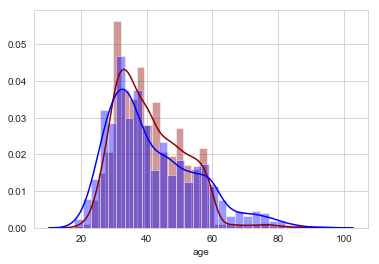

In [30]:
sns.distplot(df[(df['deposit'] == 'no')]['age'], kde=True,  color='darkred', bins=30)
sns.distplot(df[(df['deposit'] == 'yes')]['age'], kde=True, color='blue', bins=30)

### 'pdays'

In [31]:
df.describe()['pdays']

count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
max        854.000000
Name: pdays, dtype: float64

In [32]:
len(df[df['pdays'] == -1])/len(df)

0.745744490234725

### Checking 'balance'

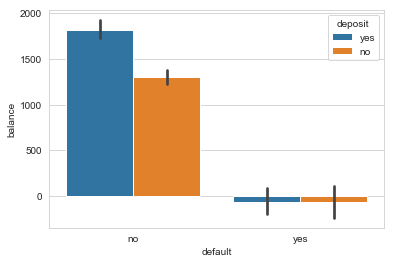

In [33]:
sns.barplot(x='default', y='balance',data=df, hue='deposit')

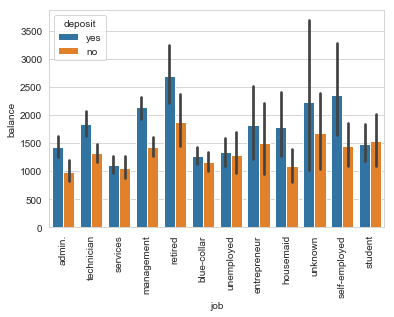

In [34]:
sns.barplot(x='job', y='balance',data=df, hue='deposit')
plt.xticks(rotation=90)
plt.show()

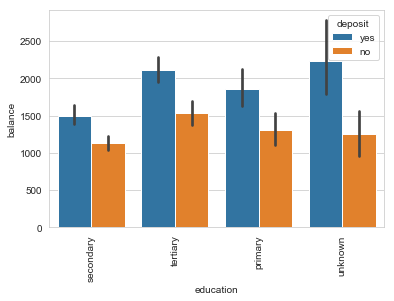

In [35]:
sns.barplot(x='education', y='balance',data=df, hue='deposit')
plt.xticks(rotation=90)
plt.show()

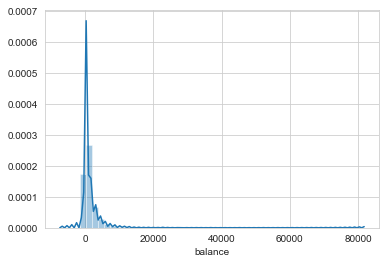

In [36]:
sns.distplot(df['balance'])

In [37]:
df[df['balance'] > 20000]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_rate
771,32,technician,single,tertiary,no,34646,no,no,telephone,13,aug,618,9,-1,0,unknown,yes,1
1010,45,entrepreneur,married,tertiary,no,20138,yes,no,cellular,20,nov,871,5,-1,0,unknown,yes,1
1073,49,management,married,tertiary,no,22520,no,no,cellular,21,nov,579,9,-1,0,unknown,yes,1
1271,24,student,single,secondary,no,23878,no,no,cellular,18,feb,185,1,-1,0,unknown,yes,1
1744,29,management,single,tertiary,no,36252,yes,no,cellular,30,apr,501,1,-1,0,unknown,yes,1
2132,24,student,single,secondary,no,23878,no,no,cellular,26,may,133,1,97,1,success,yes,1
2226,55,entrepreneur,married,secondary,no,27624,no,no,telephone,3,jun,437,1,-1,0,unknown,yes,1
2258,39,admin.,single,tertiary,no,22086,no,no,cellular,4,jun,160,1,-1,0,unknown,yes,1
2323,27,management,single,tertiary,no,20585,no,no,cellular,15,jun,188,1,-1,0,unknown,yes,1
2468,61,self-employed,divorced,tertiary,no,52587,no,no,cellular,10,aug,290,1,-1,0,unknown,yes,1


In [38]:
df[df['balance'] == 81204]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_rate
3043,84,retired,married,secondary,no,81204,no,no,telephone,28,dec,679,1,313,2,other,yes,1
3380,84,retired,married,secondary,no,81204,no,no,telephone,1,apr,390,1,94,3,success,yes,1


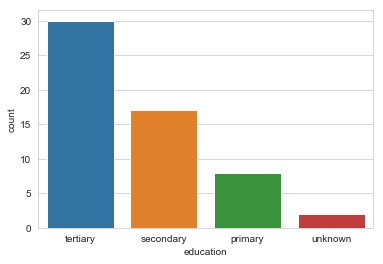

In [39]:
sns.countplot(df[df['balance'] > 20000]['education'])

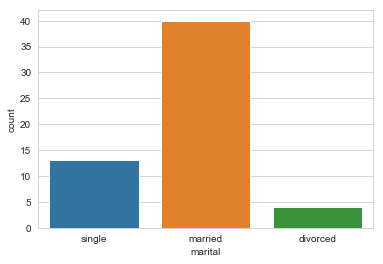

In [40]:
sns.countplot(df[df['balance'] > 20000]['marital'])

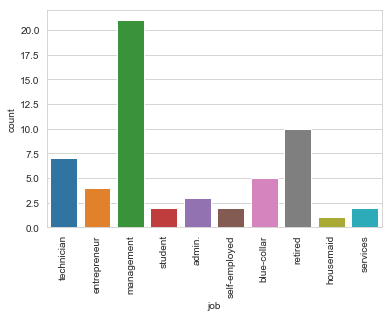

In [41]:
sns.countplot(df[df['balance'] > 20000]['job'])
plt.xticks(rotation=90)
plt.show()

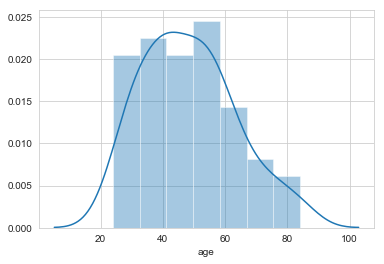

In [42]:
sns.distplot(df[df['balance'] > 20000]['age'])

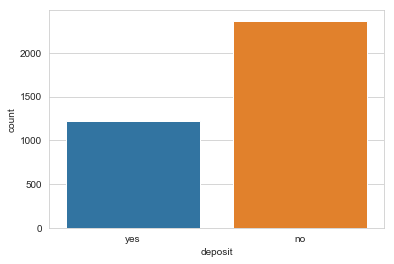

In [43]:
sns.countplot(df[(df['housing'] == 'yes') & (df['balance'] < 1000)]['deposit'])

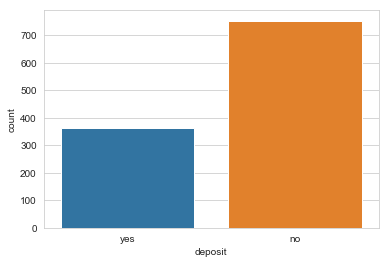

In [44]:
sns.countplot(df[(df['loan'] == 'yes') & (df['balance'] < 1000)]['deposit'])

### Previous

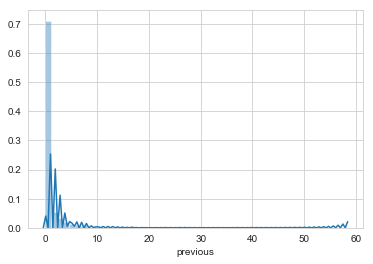

In [45]:
sns.distplot(df['previous'])

In [46]:
df['previous'] = df['previous'].map(lambda x: 2 if x>20 else x)

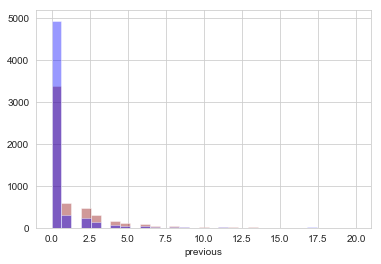

In [47]:
sns.distplot(df[df['deposit'] == 'yes']['previous'], color='darkred', bins=31, kde=False)
sns.distplot(df[df['deposit'] == 'no']['previous'], color='blue', bins=31, kde=False)

In [48]:
df.corr()

,age,balance,day,duration,campaign,pdays,previous,deposit_rate
age,1.000000,0.112300,-0.000762,0.000189,-0.002711,0.002774,0.033874,0.034901
balance,0.112300,1.000000,0.010467,0.022436,-0.010375,0.017411,0.033543,0.081129
day,-0.000762,0.010467,1.000000,-0.018511,0.133406,-0.077232,-0.055157,-0.056326
duration,0.000189,0.022436,-0.018511,1.000000,-0.023183,-0.027392,-0.036492,0.451919
campaign,-0.002711,-0.010375,0.133406,-0.023183,1.000000,-0.106220,-0.060725,-0.125293
pdays,0.002774,0.017411,-0.077232,-0.027392,-0.106220,1.000000,0.540790,0.151593
previous,0.033874,0.033543,-0.055157,-0.036492,-0.060725,0.540790,1.000000,0.162826
deposit_rate,0.034901,0.081129,-0.056326,0.451919,-0.125293,0.151593,0.162826,1.000000


In [49]:
df[df['previous'] > 7]['deposit'].value_counts()

yes    135
no      70
Name: deposit, dtype: int64

### Day and Deposit Correlation

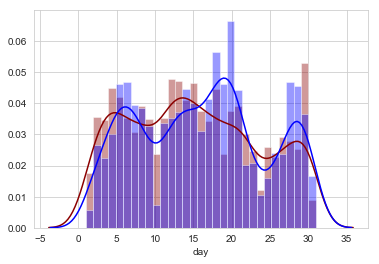

In [50]:
sns.distplot(df[df['deposit'] == 'yes']['day'], color='darkred', bins=31)
sns.distplot(df[df['deposit'] == 'no']['day'], color='blue', bins=31)

### Duration and Deposit Correlation

In [51]:
df.describe()['duration']

count    11162.000000
mean       371.993818
std        347.128386
min          2.000000
25%        138.000000
50%        255.000000
75%        496.000000
max       3881.000000
Name: duration, dtype: float64

In [52]:
df[df['duration'] > 3600]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_rate
271,59,management,married,secondary,no,1321,no,no,unknown,9,jun,3881,3,-1,0,unknown,yes,1


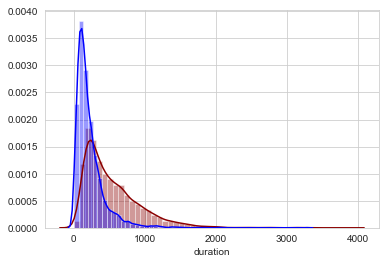

In [53]:
sns.distplot(df[df['deposit'] == 'yes']['duration'], color='darkred')
sns.distplot(df[df['deposit'] == 'no']['duration'], color='blue')

# Data Cleaning

In [54]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,deposit_rate
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,1


In [55]:
df_raw = df.drop(['pdays', 'poutcome'], axis=1)

In [56]:
df_raw.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,previous,deposit,deposit_rate
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,0,yes,1
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,0,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,0,yes,1
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,0,yes,1
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,0,yes,1


In [57]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

preprocess = make_column_transformer(
    ([1,2,3,8,10], OneHotEncoder(sparse=False)), remainder = 'passthrough'
)

ohe = preprocess.fit(df_raw)

ser = ohe.transform(df_raw)

ohe_test = preprocess.fit(df_raw.drop(['deposit', 'deposit_rate'], axis=1))

c:\users\fikri averous\appdata\local\programs\python\python37\lib\site-packages\sklearn\compose\_column_transformer.py:778: DeprecationWarning: `make_column_transformer` now expects (transformer, columns) as input tuples instead of (columns, transformer). This has been introduced in v0.20.1. `make_column_transformer` will stop accepting the deprecated (columns, transformer) order in v0.22.
  warnings.warn(message, DeprecationWarning)


In [58]:
ser[0]

array([1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,
       1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0,
       0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 59, 'no', 2343, 'yes',
       'no', 5, 1042, 1, 0, 'yes', 1], dtype=object)

In [59]:
df_cleaned = pd.DataFrame(
    ser, columns=list(df_raw['job'].unique())+list(df_raw['marital'].unique())+list(df_raw['education'].unique())+list(df_raw['contact'].unique())+list(df_raw['month'].unique())+['age','default','balance','housing','loan','day','duration','campaign','previous','deposit','deposit_rate']
)
df_cleaned.head()

,admin.,technician,services,management,retired,blue-collar,unemployed,entrepreneur,housemaid,unknown,...,default,balance,housing,loan,day,duration,campaign,previous,deposit,deposit_rate
0,1,0,0,0,0,0,0,0,0,0,...,no,2343,yes,no,5,1042,1,0,yes,1
1,1,0,0,0,0,0,0,0,0,0,...,no,45,no,no,5,1467,1,0,yes,1
2,0,0,0,0,0,0,0,0,0,1,...,no,1270,yes,no,5,1389,1,0,yes,1
3,0,0,0,0,0,0,0,1,0,0,...,no,2476,yes,no,5,579,1,0,yes,1
4,1,0,0,0,0,0,0,0,0,0,...,no,184,no,no,5,673,2,0,yes,1


In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

le_default = le.fit(df_cleaned['default'])
df_cleaned['default'] = le_default.transform(df_cleaned['default'])

le_housing = le.fit(df_cleaned['housing'])
df_cleaned['housing'] = le_housing.transform(df_cleaned['housing'])

le_loan = le.fit(df_cleaned['loan'])
df_cleaned['loan'] = le_loan.transform(df_cleaned['loan'])

In [61]:
df_cleaned = df_cleaned.drop('deposit', axis = 1)

In [62]:
df_cleaned.head()

,admin.,technician,services,management,retired,blue-collar,unemployed,entrepreneur,housemaid,unknown,...,age,default,balance,housing,loan,day,duration,campaign,previous,deposit_rate
0,1,0,0,0,0,0,0,0,0,0,...,59,0,2343,1,0,5,1042,1,0,1
1,1,0,0,0,0,0,0,0,0,0,...,56,0,45,0,0,5,1467,1,0,1
2,0,0,0,0,0,0,0,0,0,1,...,41,0,1270,1,0,5,1389,1,0,1
3,0,0,0,0,0,0,0,1,0,0,...,55,0,2476,1,0,5,579,1,0,1
4,1,0,0,0,0,0,0,0,0,0,...,54,0,184,0,0,5,673,2,0,1


In [63]:
df_cleaned.head()

,admin.,technician,services,management,retired,blue-collar,unemployed,entrepreneur,housemaid,unknown,...,age,default,balance,housing,loan,day,duration,campaign,previous,deposit_rate
0,1,0,0,0,0,0,0,0,0,0,...,59,0,2343,1,0,5,1042,1,0,1
1,1,0,0,0,0,0,0,0,0,0,...,56,0,45,0,0,5,1467,1,0,1
2,0,0,0,0,0,0,0,0,0,1,...,41,0,1270,1,0,5,1389,1,0,1
3,0,0,0,0,0,0,0,1,0,0,...,55,0,2476,1,0,5,579,1,0,1
4,1,0,0,0,0,0,0,0,0,0,...,54,0,184,0,0,5,673,2,0,1


In [64]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 44 columns):
admin.           11162 non-null object
technician       11162 non-null object
services         11162 non-null object
management       11162 non-null object
retired          11162 non-null object
blue-collar      11162 non-null object
unemployed       11162 non-null object
entrepreneur     11162 non-null object
housemaid        11162 non-null object
unknown          11162 non-null object
self-employed    11162 non-null object
student          11162 non-null object
married          11162 non-null object
single           11162 non-null object
divorced         11162 non-null object
secondary        11162 non-null object
tertiary         11162 non-null object
primary          11162 non-null object
unknown          11162 non-null object
unknown          11162 non-null object
cellular         11162 non-null object
telephone        11162 non-null object
may              11162 non-null o

In [65]:
for item in df_cleaned.drop(['default','housing','loan'], axis=1):
    df_cleaned[item] = df_cleaned[item].astype(int)

In [66]:
df_cleaned.columns = ['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid', 'unknown_job',
       'self-employed', 'student', 'married', 'single', 'divorced',
       'secondary', 'tertiary', 'primary', 'unknown_education', 'unknown_contact', 'cellular',
       'telephone', 'may', 'jun', 'jul', 'aug', 'oct', 'nov', 'dec', 'jan',
       'feb', 'mar', 'apr', 'sep', 'age', 'default', 'balance', 'housing',
       'loan', 'day', 'duration', 'campaign', 'previous', 'deposit_rate']

In [67]:
df_cleaned.drop(['admin.', 'married', 'secondary', 'unknown_contact'], axis=1, inplace=True)

In [68]:
df_cleaned.shape

(11162, 40)

# Train Test Split

In [69]:
from sklearn.model_selection import train_test_split

In [70]:
x_train, x_test, y_train, y_test = train_test_split(df_cleaned.drop('deposit_rate', axis=1),
                                                   df_cleaned['deposit_rate'],
                                                   test_size=0.30,
                                                   random_state=101)

In [71]:
y_train.value_counts()

0    4112
1    3701
Name: deposit_rate, dtype: int64

In [72]:
y_test.value_counts()

0    1761
1    1588
Name: deposit_rate, dtype: int64

In [73]:
y_train.value_counts()/(4112+3701)

0    0.526302
1    0.473698
Name: deposit_rate, dtype: float64

In [74]:
y_test.value_counts()/(1761+1588)

0    0.525829
1    0.474171
Name: deposit_rate, dtype: float64

In [75]:
df['deposit_rate'].value_counts()/len(df)

0    0.52616
1    0.47384
Name: deposit_rate, dtype: float64

In [76]:
x_train.head()

,technician,services,management,retired,blue-collar,unemployed,entrepreneur,housemaid,unknown_job,self-employed,...,sep,age,default,balance,housing,loan,day,duration,campaign,previous
2328,0,0,0,1,0,0,0,0,0,0,...,0,26,0,170,0,0,15,129,1,0
469,1,0,0,0,0,0,0,0,0,0,...,0,44,0,1265,1,0,16,555,1,0
1190,0,0,0,0,0,0,0,0,1,0,...,0,54,0,0,0,0,5,744,3,0
10120,0,0,0,0,0,0,0,0,1,0,...,0,31,0,53,0,0,28,97,2,0
7298,0,1,0,0,0,0,0,0,0,0,...,0,35,0,1859,1,0,14,227,2,0


In [77]:
y_train

2328     1
469      1
1190     1
10120    0
7298     0
        ..
599      1
5695     0
8006     0
1361     1
1547     1
Name: deposit_rate, Length: 7813, dtype: int32

### 1. Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [79]:
rfc = RandomForestClassifier(n_estimators=100, random_state=50)
rfc.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

### Evaluation Model

### Training Error

In [80]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score, auc, log_loss, roc_auc_score, f1_score, matthews_corrcoef

In [81]:
predictTrain = rfc.predict(x_train)

In [82]:
con = pd.DataFrame(data=confusion_matrix(y_train, predictTrain), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])
print(con)

       P No  P Yes
A No   4112      0
A Yes     0   3701


In [83]:
print(classification_report(y_train, predictTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4112
           1       1.00      1.00      1.00      3701

    accuracy                           1.00      7813
   macro avg       1.00      1.00      1.00      7813
weighted avg       1.00      1.00      1.00      7813



### Testing Error

In [84]:
predictTest = rfc.predict(x_test)

In [85]:
con_test = pd.DataFrame(data=confusion_matrix(y_test, predictTest), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])
print(con_test)

       P No  P Yes
A No   1441    320
A Yes   181   1407


In [86]:
print(classification_report(y_test, predictTest))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1761
           1       0.81      0.89      0.85      1588

    accuracy                           0.85      3349
   macro avg       0.85      0.85      0.85      3349
weighted avg       0.85      0.85      0.85      3349



In [87]:
predictProbTest = rfc.predict_proba(x_test)

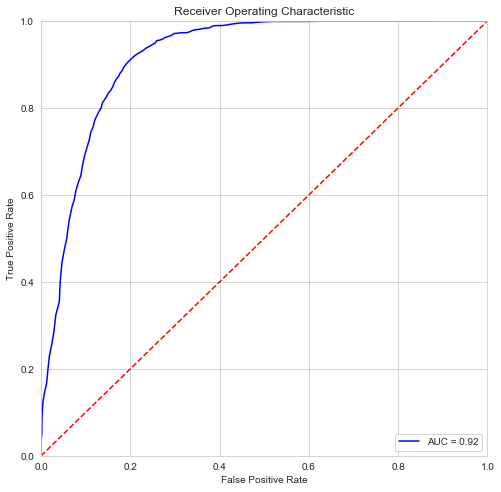

In [88]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
log_loss(y_test, predictProbTest[:,1])

0.3611605475804191

### K Fold

In [90]:
def calc_error(x, y, model):
    predictions = model.predict(x)
    predictProba = model.predict_proba(x)
    accuracy = accuracy_score(y, predictions)
    f1 = f1_score(y, predictions, average='macro')
    roc_auc = roc_auc_score(y, predictProba[:,1])
    logloss = log_loss(y, predictProba)
    report = classification_report(y, predictions)
    return {
        'report': report,
        'f1': f1,
        'roc': roc_auc,
        'accuracy': accuracy,
        'logloss': logloss
    }

def calc_metrics(x_train, y_train, x_test, y_test, model):
    model.fit(x_train, y_train)
    train_error = calc_error(x_train, y_train, model)
    validation_error = calc_error(x_test, y_test, model)
    return train_error, validation_error

In [91]:
from sklearn.model_selection import KFold

k = 5
kf = KFold(n_splits=k, shuffle=True, random_state=42)

In [92]:
data = df_cleaned.drop('deposit_rate', axis=1)
target = df_cleaned['deposit_rate']

In [93]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    x_train1, x_val = data.iloc[train_index], data.iloc[val_index]
    y_train1, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # instantiate model
    rfc = RandomForestClassifier(n_estimators = 100, random_state = 101)
    
    # calculate errors
    train_error, val_error = calc_metrics(x_train1, y_train1, x_val, y_val, rfc)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [94]:
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],tr['logloss'],val['logloss']])
    
listItem.append(list(np.mean(listItem,axis=0)))

dfEvalRFC = pd.DataFrame(listItem,
                         columns=['Train Accuracy',
                                 'Test Accuracy',
                                 'Train ROC AUC',
                                 'Test ROC AUC',
                                 'Train F1 Score',
                                 'Test F1 Score',
                                 'Train Log Loss',
                                 'Test Log Loss'])
listIndex = list(dfEvalRFC.index)
listIndex[-1] = 'Average'
dfEvalRFC.index = listIndex
dfEvalRFC

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Log Loss,Test Log Loss
0,1.0,0.844156,1.0,0.913400,1.0,0.844152,0.101289,0.367299
1,1.0,0.855352,1.0,0.920298,1.0,0.855325,0.101722,0.372423
2,1.0,0.856183,1.0,0.919131,1.0,0.856108,0.101809,0.358673
3,1.0,0.852599,1.0,0.916737,1.0,0.852481,0.100643,0.362325
4,1.0,0.856631,1.0,0.917224,1.0,0.856446,0.100973,0.360157
Average,1.0,0.852984,1.0,0.917358,1.0,0.852903,0.101287,0.364176


### 2. XGBoost Classifier

In [95]:
from xgboost import XGBClassifier

In [96]:
x_train.columns

Index(['technician', 'services', 'management', 'retired', 'blue-collar',
       'unemployed', 'entrepreneur', 'housemaid', 'unknown_job',
       'self-employed', 'student', 'single', 'divorced', 'tertiary', 'primary',
       'unknown_education', 'cellular', 'telephone', 'may', 'jun', 'jul',
       'aug', 'oct', 'nov', 'dec', 'jan', 'feb', 'mar', 'apr', 'sep', 'age',
       'default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign',
       'previous'],
      dtype='object')

In [97]:
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [98]:
predictTrain = xgb.predict(x_train)

In [99]:
con = pd.DataFrame(data=confusion_matrix(y_train, predictTrain), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])
print(con)

       P No  P Yes
A No   3413    699
A Yes   452   3249


In [100]:
print(classification_report(y_train, predictTrain))

              precision    recall  f1-score   support

           0       0.88      0.83      0.86      4112
           1       0.82      0.88      0.85      3701

    accuracy                           0.85      7813
   macro avg       0.85      0.85      0.85      7813
weighted avg       0.85      0.85      0.85      7813



In [101]:
predictTest = xgb.predict(x_test)

In [102]:
con_test = pd.DataFrame(data=confusion_matrix(y_test, predictTest), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])
print(con_test)

       P No  P Yes
A No   1442    319
A Yes   215   1373


In [103]:
print(classification_report(y_test, predictTest))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1761
           1       0.81      0.86      0.84      1588

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



In [104]:
predictProbTest = xgb.predict_proba(x_test)

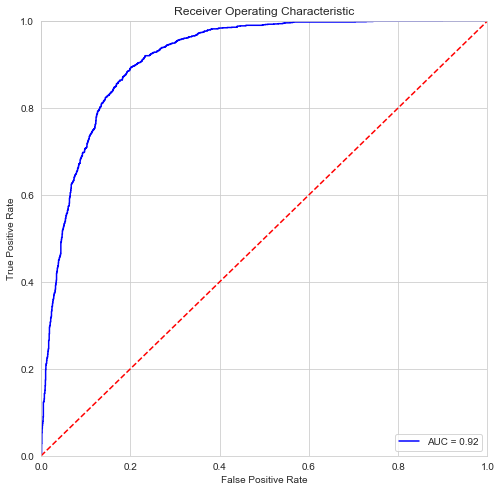

In [105]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [106]:
log_loss(y_test, predictProbTest[:,1])

0.36587630774326363

In [107]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(x_train, y_train):
    
    # split data
    x_train1, x_val = x_train.iloc[train_index], x_train.iloc[val_index]
    y_train1, y_val = y_train.iloc[train_index], y_train.iloc[val_index]    
    
    # instantiate model
    xgb = XGBClassifier()
    
    # calculate errors
    train_error, val_error = calc_metrics(x_train1, y_train1, x_val, y_val, xgb)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [108]:
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],tr['logloss'],val['logloss']])
    
listItem.append(list(np.mean(listItem,axis=0)))

dfEvalXGB = pd.DataFrame(listItem,
                         columns=['Train Accuracy',
                                 'Test Accuracy',
                                 'Train ROC AUC',
                                 'Test ROC AUC',
                                 'Train F1 Score',
                                 'Test F1 Score',
                                 'Train Log Loss',
                                 'Test Log Loss'])
listIndex = list(dfEvalXGB.index)
listIndex[-1] = 'Average'
dfEvalXGB.index = listIndex
dfEvalXGB

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Log Loss,Test Log Loss
0,0.850080,0.846449,0.926997,0.917125,0.850024,0.846410,0.348804,0.365230
1,0.855200,0.846449,0.929069,0.914794,0.855092,0.846448,0.345436,0.366424
2,0.857440,0.854127,0.930104,0.917006,0.857348,0.854109,0.342164,0.364271
3,0.858103,0.827145,0.931292,0.903380,0.858043,0.826872,0.339517,0.387105
4,0.852824,0.833547,0.929444,0.905304,0.852802,0.833172,0.342425,0.385464
Average,0.854729,0.841543,0.929381,0.911522,0.854662,0.841402,0.343669,0.373699


### 3. Logistic Regression

In [109]:
from sklearn.linear_model import LogisticRegression

In [110]:
lr = LogisticRegression()
lr.fit(x_train, y_train)

c:\users\fikri averous\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [111]:
predictTrain = lr.predict(x_train)

In [112]:
con = pd.DataFrame(data=confusion_matrix(y_train, predictTrain), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])
print(con)

       P No  P Yes
A No   3445    667
A Yes   775   2926


In [113]:
print(classification_report(y_train, predictTrain))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83      4112
           1       0.81      0.79      0.80      3701

    accuracy                           0.82      7813
   macro avg       0.82      0.81      0.81      7813
weighted avg       0.82      0.82      0.82      7813



In [114]:
predictTest = lr.predict(x_test)

In [115]:
con_test = pd.DataFrame(data=confusion_matrix(y_test, predictTest), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])
print(con_test)

       P No  P Yes
A No   1473    288
A Yes   337   1251


In [116]:
print(classification_report(y_test, predictTest))

              precision    recall  f1-score   support

           0       0.81      0.84      0.82      1761
           1       0.81      0.79      0.80      1588

    accuracy                           0.81      3349
   macro avg       0.81      0.81      0.81      3349
weighted avg       0.81      0.81      0.81      3349



In [117]:
predictProbTest = lr.predict_proba(x_test)

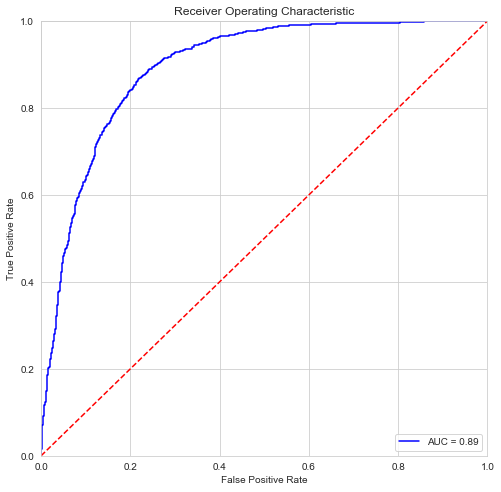

In [118]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [119]:
log_loss(y_test, predictProbTest[:,1])

0.4245996859864126

In [120]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    x_train1, x_val = data.iloc[train_index], data.iloc[val_index]
    y_train1, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # instantiate model
    lr = LogisticRegression()
    
    # calculate errors
    train_error, val_error = calc_metrics(x_train1, y_train1, x_val, y_val, lr)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

c:\users\fikri averous\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\fikri averous\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\fikri averous\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\fikri averous\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\fikri averous\appda

In [121]:
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],tr['logloss'],val['logloss']])
    
listItem.append(list(np.mean(listItem,axis=0)))

dfEvalLR = pd.DataFrame(listItem,
                         columns=['Train Accuracy',
                                 'Test Accuracy',
                                 'Train ROC AUC',
                                 'Test ROC AUC',
                                 'Train F1 Score',
                                 'Test F1 Score',
                                 'Train Log Loss',
                                 'Test Log Loss'])
listIndex = list(dfEvalLR.index)
listIndex[-1] = 'Average'
dfEvalLR.index = listIndex
dfEvalLR

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Log Loss,Test Log Loss
0,0.818681,0.796238,0.894673,0.889166,0.817715,0.795524,0.429028,0.434369
1,0.814873,0.816838,0.893207,0.893897,0.813793,0.816513,0.429730,0.432193
2,0.814558,0.818548,0.893526,0.892829,0.813810,0.817477,0.427926,0.438605
3,0.814670,0.813620,0.894928,0.887048,0.813935,0.812533,0.427670,0.438412
4,0.812766,0.811828,0.893538,0.893190,0.812021,0.810396,0.431414,0.426735
Average,0.815109,0.811415,0.893974,0.891226,0.814255,0.810488,0.429153,0.434063


### 4. Gradient Boosting Classifier

In [122]:
from sklearn.ensemble import GradientBoostingClassifier

gbc = GradientBoostingClassifier(n_estimators=100)
gbc.fit(x_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [123]:
predictTrain = gbc.predict(x_train)

In [124]:
con = pd.DataFrame(data=confusion_matrix(y_train, predictTrain), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])
print(con)

       P No  P Yes
A No   3443    669
A Yes   472   3229


In [125]:
print(classification_report(y_train, predictTrain))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      4112
           1       0.83      0.87      0.85      3701

    accuracy                           0.85      7813
   macro avg       0.85      0.85      0.85      7813
weighted avg       0.86      0.85      0.85      7813



In [126]:
predictTest = gbc.predict(x_test)

In [127]:
con_test = pd.DataFrame(data=confusion_matrix(y_test, predictTest), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])
print(con_test)

       P No  P Yes
A No   1454    307
A Yes   225   1363


In [128]:
print(classification_report(y_test, predictTest))

              precision    recall  f1-score   support

           0       0.87      0.83      0.85      1761
           1       0.82      0.86      0.84      1588

    accuracy                           0.84      3349
   macro avg       0.84      0.84      0.84      3349
weighted avg       0.84      0.84      0.84      3349



In [129]:
predictProbTest = gbc.predict_proba(x_test)

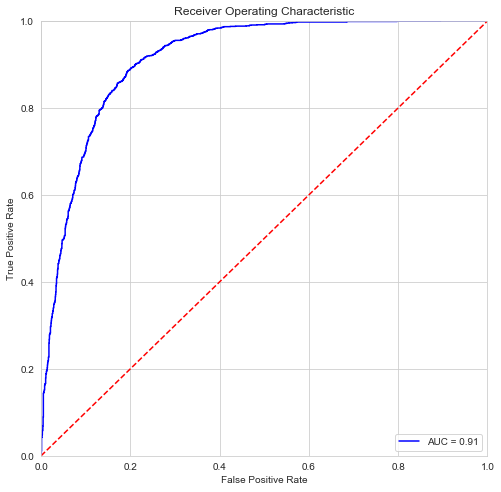

In [130]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [131]:
log_loss(y_test, predictProbTest[:,1])

0.3687693281937094

In [132]:
train_errors = []
validation_errors = []
for train_index, val_index in kf.split(data, target):
    
    # split data
    x_train1, x_val = data.iloc[train_index], data.iloc[val_index]
    y_train1, y_val = target.iloc[train_index], target.iloc[val_index]
    
#     print(len(x_val), (len(x_train1) + len(x_val)))
    
    # instantiate model
    gbc = GradientBoostingClassifier(n_estimators=100)
    
    # calculate errors
    train_error, val_error = calc_metrics(x_train1, y_train1, x_val, y_val, gbc)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [133]:
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],tr['logloss'],val['logloss']])
    
listItem.append(list(np.mean(listItem,axis=0)))

dfEvalGB = pd.DataFrame(listItem,
                         columns=['Train Accuracy',
                                 'Test Accuracy',
                                 'Train ROC AUC',
                                 'Test ROC AUC',
                                 'Train F1 Score',
                                 'Test F1 Score',
                                 'Train Log Loss',
                                 'Test Log Loss'])
listIndex = list(dfEvalGB.index)
listIndex[-1] = 'Average'
dfEvalGB.index = listIndex
dfEvalGB

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Log Loss,Test Log Loss
0,0.860007,0.828034,0.930190,0.909581,0.859913,0.827958,0.340598,0.378701
1,0.856311,0.850425,0.929997,0.919720,0.856142,0.850417,0.341798,0.358832
2,0.852520,0.844086,0.929273,0.915110,0.852421,0.843747,0.344924,0.368216
3,0.858343,0.849910,0.931925,0.912365,0.858267,0.849703,0.338454,0.369063
4,0.854199,0.852599,0.929505,0.914072,0.854133,0.852233,0.343706,0.366393
Average,0.856276,0.845011,0.930178,0.914170,0.856175,0.844811,0.341896,0.368241


### 5. Decision Tree Classifier

In [134]:
from sklearn.tree import DecisionTreeClassifier

In [135]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [136]:
predictTrain = dtc.predict(x_train)

In [137]:
con = pd.DataFrame(data=confusion_matrix(y_train, predictTrain), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])
print(con)

       P No  P Yes
A No   4112      0
A Yes     0   3701


In [138]:
print(classification_report(y_train, predictTrain))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4112
           1       1.00      1.00      1.00      3701

    accuracy                           1.00      7813
   macro avg       1.00      1.00      1.00      7813
weighted avg       1.00      1.00      1.00      7813



In [139]:
predictTest = dtc.predict(x_test)

In [140]:
con_test = pd.DataFrame(data=confusion_matrix(y_test, predictTest), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])
print(con_test)

       P No  P Yes
A No   1403    358
A Yes   336   1252


In [141]:
print(classification_report(y_test, predictTest))

              precision    recall  f1-score   support

           0       0.81      0.80      0.80      1761
           1       0.78      0.79      0.78      1588

    accuracy                           0.79      3349
   macro avg       0.79      0.79      0.79      3349
weighted avg       0.79      0.79      0.79      3349



In [142]:
predictProbTest = dtc.predict_proba(x_test)

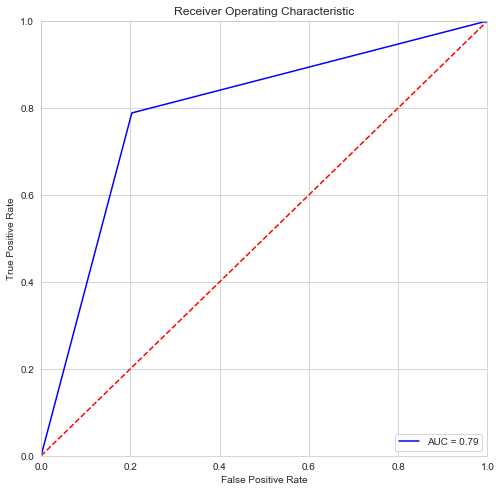

In [143]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [144]:
log_loss(y_test, predictProbTest[:,1])

7.157419251701411

In [145]:
train_errors = []
validation_errors = []
data = df_cleaned.drop('deposit_rate', axis=1)
target = df_cleaned['deposit_rate']
for train_index, val_index in kf.split(data, target):
    
    # split data
    x_train1, x_val = data.iloc[train_index], data.iloc[val_index]
    y_train1, y_val = target.iloc[train_index], target.iloc[val_index]
    
    # instantiate model
    dtc = DecisionTreeClassifier()

    # calculate errors
    train_error, val_error = calc_metrics(x_train1, y_train1, x_val, y_val, dtc)
    
    # append to appropriate list
    train_errors.append(train_error)
    validation_errors.append(val_error)

In [146]:
listItem = []
for tr, val in zip(train_errors, validation_errors):
    listItem.append([tr['accuracy'],val['accuracy'],tr['roc'],val['roc'],tr['f1'],val['f1'],tr['logloss'],val['logloss']])
    
listItem.append(list(np.mean(listItem,axis=0)))

dfEvalDTC = pd.DataFrame(listItem,
                         columns=['Train Accuracy',
                                 'Test Accuracy',
                                 'Train ROC AUC',
                                 'Test ROC AUC',
                                 'Train F1 Score',
                                 'Test F1 Score',
                                 'Train Log Loss',
                                 'Test Log Loss'])
listIndex = list(dfEvalDTC.index)
listIndex[-1] = 'Average'
dfEvalDTC.index = listIndex
dfEvalDTC

,Train Accuracy,Test Accuracy,Train ROC AUC,Test ROC AUC,Train F1 Score,Test F1 Score,Train Log Loss,Test Log Loss
0,1.0,0.785043,1.0,0.784182,1.0,0.784410,9.992007e-16,7.424368
1,1.0,0.791760,1.0,0.791583,1.0,0.791638,9.992007e-16,7.192356
2,1.0,0.787634,1.0,0.786942,1.0,0.786912,9.992007e-16,7.334848
3,1.0,0.767473,1.0,0.765797,1.0,0.766132,9.992007e-16,8.031194
4,1.0,0.790323,1.0,0.788486,1.0,0.788856,9.992007e-16,7.242002
Average,1.0,0.784447,1.0,0.783398,1.0,0.783590,9.992007e-16,7.444953


### Comparing Model

In [147]:
outside = ['Accuracy', 'Accuracy', 'Accuracy', 'Accuracy', 'Accuracy','Accuracy', 'Accuracy',
          'ROC_AUC', 'ROC_AUC', 'ROC_AUC', 'ROC_AUC', 'ROC_AUC','ROC_AUC', 'ROC_AUC',
          'F1','F1','F1','F1','F1', 'F1','F1',
          'Logloss','Logloss','Logloss','Logloss','Logloss','Logloss','Logloss']
inside = [1,2,3,4,5,'Avg','Std', 1,2,3,4,5,'Avg','Std', 1,2,3,4,5,'Avg','Std', 1,2,3,4,5,'Avg','Std']
hier_index = list(zip(outside, inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)
hier_index

MultiIndex([('Accuracy',     1),
            ('Accuracy',     2),
            ('Accuracy',     3),
            ('Accuracy',     4),
            ('Accuracy',     5),
            ('Accuracy', 'Avg'),
            ('Accuracy', 'Std'),
            ( 'ROC_AUC',     1),
            ( 'ROC_AUC',     2),
            ( 'ROC_AUC',     3),
            ( 'ROC_AUC',     4),
            ( 'ROC_AUC',     5),
            ( 'ROC_AUC', 'Avg'),
            ( 'ROC_AUC', 'Std'),
            (      'F1',     1),
            (      'F1',     2),
            (      'F1',     3),
            (      'F1',     4),
            (      'F1',     5),
            (      'F1', 'Avg'),
            (      'F1', 'Std'),
            ( 'Logloss',     1),
            ( 'Logloss',     2),
            ( 'Logloss',     3),
            ( 'Logloss',     4),
            ( 'Logloss',     5),
            ( 'Logloss', 'Avg'),
            ( 'Logloss', 'Std')],
           )

In [148]:
acc = []
rauc = []
F1 = []
logloss = []

kol = {
    'acc' : 'Test Accuracy',
    'auc' : 'Test ROC AUC',
    'F1' : 'Test F1 Score',
    'Logloss' : 'Test Log Loss'
}

for Erfc, Egbc, Exgb, Exlr, Exdtc in zip(dfEvalRFC.iloc[:5].values, dfEvalGB.iloc[:5].values, dfEvalXGB.iloc[:5].values, dfEvalLR.iloc[:5].values, dfEvalDTC.iloc[:5].values):
    acc.append([Erfc[1], Egbc[1], Exgb[1], Exlr[1], Exdtc[1]])
    rauc.append([Erfc[3], Egbc[3], Exgb[3], Exlr[3], Exdtc[3]])
    F1.append([Erfc[5], Egbc[5], Exgb[5], Exlr[5], Exdtc[5]])
    logloss.append([Erfc[7],Egbc[7], Exgb[7], Exlr[7], Exdtc[7]])

for i,j in zip([acc,rauc,F1,logloss], ['acc','auc','F1','Logloss']):
    i.append([dfEvalRFC[kol[j]].mean(), dfEvalGB[kol[j]].mean(), dfEvalXGB[kol[j]].mean(), dfEvalLR[kol[j]].mean(),dfEvalDTC[kol[j]].mean()])
    i.append([dfEvalRFC[kol[j]].std(), dfEvalGB[kol[j]].std(), dfEvalXGB[kol[j]].std(), dfEvalLR[kol[j]].std(),dfEvalDTC[kol[j]].std()])


dfEval = pd.concat([pd.DataFrame(acc),pd.DataFrame(rauc),pd.DataFrame(F1),pd.DataFrame(logloss)], axis=0)
dfEval.columns = ['RFC', 'GBC', 'XGB', 'LR', 'DtC']
dfEval.index = hier_index
dfEval

RFC       GBC       XGB        LR       DtC
Accuracy 1    0.844156  0.828034  0.846449  0.796238  0.785043
         2    0.855352  0.850425  0.846449  0.816838  0.791760
         3    0.856183  0.844086  0.854127  0.818548  0.787634
         4    0.852599  0.849910  0.827145  0.813620  0.767473
         5    0.856631  0.852599  0.833547  0.811828  0.790323
         Avg  0.852984  0.845011  0.841543  0.811415  0.784447
         Std  0.004631  0.008944  0.009775  0.007946  0.008794
ROC_AUC  1    0.913400  0.909581  0.917125  0.889166  0.784182
         2    0.920298  0.919720  0.914794  0.893897  0.791583
         3    0.919131  0.915110  0.917006  0.892829  0.786942
         4    0.916737  0.912365  0.903380  0.887048  0.765797
         5    0.917224  0.914072  0.905304  0.893190  0.788486
         Avg  0.917358  0.914170  0.911522  0.891226  0.783398
         Std  0.002360  0.003347  0.005952  0.002656  0.009120
F1       1    0.844152  0.827958  0.846410  0.795524  0.784410
         2    0.855325  0.850417  0.846448  0.816513  0.791638
         3    0.856108  0.843747  0.854109  0.817477  0.786912
         4    0.852481  0.849703  0.826872  0.812533  0.766132
         5    0.856446  0.852233  0.833172  0.810396  0.788856
         Avg  0.852903  0.844811  0.841402  0.810488  0.783590
         Std  0.004592  0.008895  0.009908  0.007915  0.009044
Logloss  1    0.367299  0.378701  0.365230  0.434369  7.424368
         2    0.372423  0.358832  0.366424  0.432193  7.192356
         3    0.358673  0.368216  0.364271  0.438605  7.334848
         4    0.362325  0.369063  0.387105  0.438412  8.031194
         5    0.360157  0.366393  0.385464  0.426735  7.242002
         Avg  0.364176  0.368241  0.373699  0.434063  7.444953
         Std  0.005052  0.006357  0.010312  0.004401  0.303717

### Deployment of Optimum Model

In [149]:
from sklearn.model_selection import GridSearchCV

parameters = {'n_estimators': (75,100,125),
             'min_samples_leaf': (1,5,10)}
rfc = RandomForestClassifier(random_state=50)
dt = GridSearchCV(rfc, parameters,
                  scoring = 'precision', cv=5)
dt.fit(x_train, y_train)
dt.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [150]:
dt.best_params_ 

{'min_samples_leaf': 1, 'n_estimators': 125}

In [151]:
dt.best_score_

0.8145664438807244

In [152]:
rfc_best = dt.best_estimator_

In [153]:
rfc_best.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=50, verbose=0,
                       warm_start=False)

In [154]:
predictTest = rfc_best.predict(x_test)

In [155]:
con_test = pd.DataFrame(data=confusion_matrix(y_test, predictTest), columns=['P No', 'P Yes'], index=['A No', 'A Yes'])
print(con_test)

       P No  P Yes
A No   1439    322
A Yes   170   1418


In [156]:
print(classification_report(y_test, predictTest))

              precision    recall  f1-score   support

           0       0.89      0.82      0.85      1761
           1       0.81      0.89      0.85      1588

    accuracy                           0.85      3349
   macro avg       0.85      0.86      0.85      3349
weighted avg       0.86      0.85      0.85      3349



In [157]:
predictProbTest = rfc_best.predict_proba(x_test)
predictProbTest[:,1]

array([0.808, 0.072, 0.96 , ..., 0.608, 0.152, 0.144])

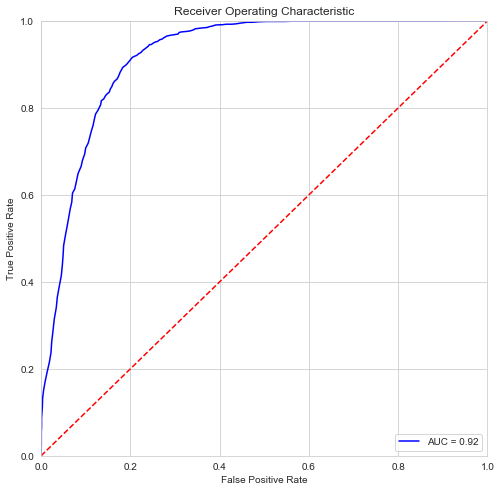

In [158]:
# calculate the fpr and tpr for all thresholds of the classification
preds = predictProbTest[:,1]
fpr, tpr, threshold = roc_curve(y_test, preds)
roc_auc = auc(fpr, tpr)

# method I: plt
plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label='AUC = {}'.format(round(roc_auc,2)))
plt.legend(loc = 'lower right')
plt.plot([0,1], [0,1], 'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [169]:
fpr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 5.67859171e-04, 5.67859171e-04,
       5.67859171e-04, 1.13571834e-03, 1.13571834e-03, 2.83929585e-03,
       3.40715503e-03, 5.67859171e-03, 9.08574673e-03, 1.30607609e-02,
       1.87393526e-02, 2.21465077e-02, 2.38500852e-02, 2.66893810e-02,
       2.95286769e-02, 3.40715503e-02, 3.63429869e-02, 4.03180011e-02,
       4.54287337e-02, 4.77001704e-02, 4.94037479e-02, 5.05394662e-02,
       5.50823396e-02, 5.84894946e-02, 6.18966496e-02, 6.53038047e-02,
       6.87109597e-02, 7.04145372e-02, 7.55252697e-02, 7.83645656e-02,
       8.29074390e-02, 8.97217490e-02, 9.25610449e-02, 9.76717774e-02,
       9.99432141e-02, 1.05621806e-01, 1.09596820e-01, 1.12436116e-01,
       1.16411130e-01, 1.19250426e-01, 1.22089722e-01, 1.27200454e-01,
       1.33446905e-01, 1.35150483e-01, 1.40261215e-01, 1.44804089e-01,
       1.47643384e-01, 1.52754117e-01, 1.55025554e-01, 1.58432709e-01,
      

In [171]:
threshold

array([1.992, 0.992, 0.984, 0.976, 0.968, 0.96 , 0.952, 0.944, 0.936,
       0.928, 0.92 , 0.912, 0.904, 0.896, 0.888, 0.88 , 0.872, 0.864,
       0.856, 0.848, 0.84 , 0.832, 0.824, 0.816, 0.808, 0.8  , 0.792,
       0.784, 0.776, 0.768, 0.76 , 0.752, 0.744, 0.736, 0.728, 0.72 ,
       0.712, 0.704, 0.696, 0.688, 0.68 , 0.672, 0.664, 0.656, 0.648,
       0.64 , 0.632, 0.624, 0.616, 0.608, 0.6  , 0.592, 0.584, 0.576,
       0.568, 0.56 , 0.552, 0.544, 0.536, 0.528, 0.52 , 0.512, 0.504,
       0.496, 0.488, 0.48 , 0.472, 0.464, 0.456, 0.448, 0.44 , 0.432,
       0.424, 0.416, 0.408, 0.4  , 0.392, 0.384, 0.376, 0.368, 0.36 ,
       0.352, 0.344, 0.328, 0.32 , 0.312, 0.304, 0.296, 0.288, 0.28 ,
       0.272, 0.264, 0.256, 0.248, 0.24 , 0.224, 0.216, 0.208, 0.2  ,
       0.192, 0.184, 0.176, 0.168, 0.16 , 0.152, 0.144, 0.136, 0.128,
       0.12 , 0.112, 0.104, 0.096, 0.088, 0.08 , 0.072, 0.064, 0.056,
       0.048, 0.04 , 0.032, 0.024, 0.016, 0.008, 0.   ])

In [174]:
hasil = []
for i in predictProbTest[:,1]:
    if i > 0.70:
        hasil.append(1)
    else:
        hasil.append(0)

In [175]:
print(classification_report(y_test, hasil))

              precision    recall  f1-score   support

           0       0.75      0.91      0.82      1761
           1       0.87      0.67      0.75      1588

    accuracy                           0.79      3349
   macro avg       0.81      0.79      0.79      3349
weighted avg       0.81      0.79      0.79      3349



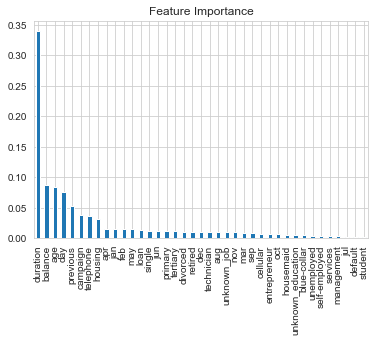

In [159]:
coef = pd.Series(rfc_best.feature_importances_, x_train.columns).sort_values(ascending=False)
coef.plot(kind='bar', title='Feature Importance')

# Conclusion and Solutions for the Next Marketing Campaign

1. **Months** of Marketing Activity: We saw that the the month of highest level of marketing activity was the month of May. However, this was the month that potential clients tended to reject term deposits offers (Lowest effective rate: -34.49%). For the next marketing campaign, it will be wise for the bank to focus the marketing campaign during the months of March, September, October and December. 
2. **Campaign** Calls: The more we call the same potential client, the likely he or she will decline to open a term deposit.
3. **Age** Category: The next marketing campaign of the bank should target potential clients in their 20s or younger and 60s or older. It will be great if for the next campaign the bank addressed these two categories and therefore, increase the likelihood of more term deposits suscriptions.
4. **Job**: Potential clients that were students or retired were the most likely to suscribe to a term deposit. Retired individuals, tend to have more term deposits in order to gain some cash through interest payments. Retired individuals tend to not spend bigly its cash so they are morelikely to put their cash to work by lending it to the financial institution. Students were the other group that used to suscribe term deposits.
5. **House Loans and Balances**: What does it mean to have a house loan? This means that the potential client has financial compromises to pay back its house loan and thus, there is no cash for he or she to suscribe to a term deposit account.
6. The **Best model** to predict opening a deposit term or not is **Random Forest Classifier**. We need the **highest Precision for class 1 with a low False Positive value**. False Positive, means the client do NOT SUBSCRIBED to term deposit, but the model thinks he did. It's very harmful, because we think that we already have that client but we dont and maybe we lost him in other future campaigns.

In [160]:
# import pickle
# with open('ohe_test.pkl', 'wb') as ohe:
#     pickle.dump(ohe_test, ohe)
# with open('le_default.pkl', 'wb') as ledefault:
#     pickle.dump(le_default, ledefault)
# with open('le_housing.pkl', 'wb') as lehousing:
#     pickle.dump(le_housing, lehousing)
# with open('le_loan.pkl', 'wb') as leloan:
#     pickle.dump(le_loan, leloan)
# with open('rfc_best.pkl', 'wb') as model:
#     pickle.dump(rfc_best, model)